<a href="https://colab.research.google.com/github/algofviqqi/ABDUL-ROHMAN-ALGOFVIQQI-SUGIARTO_G.231.21.0177_FUZZY-C-MEANS/blob/main/ABDUL_ROHMAN_ALGOFVIQQI_SUGIARTO_G_231_21_0177_FUZZY_C_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.2 MB/s eta 0:00:00


In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import skfuzzy
pd.set_option('display.max_colwidth', 25)
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [43]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [44]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [45]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [46]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [47]:
X = base.iloc[:,[1,25]].values

In [48]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [49]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [50]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [51]:
X.shape

(30000, 2)

In [52]:
X.T.shape

(2, 30000)

In [53]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error = 0.005, maxiter = 1000, init = None)

In [54]:
r

(array([[ 0.97536181, -0.42055325],
        [ 0.74970229,  2.01632514],
        [-0.73888662, -0.30174163]]),
 array([[0.06225521, 0.12402307, 0.01586459, ..., 0.03497405, 0.0298071 ,
         0.01801361],
        [0.02592715, 0.02732519, 0.00499036, ..., 0.01491978, 0.01406251,
         0.00906569],
        [0.91181765, 0.84865174, 0.97914505, ..., 0.95010617, 0.95613039,
         0.9729207 ]]),
 array([[0.48048179, 0.39051147, 0.03961786, ..., 0.4460668 , 0.46482089,
         0.08113908],
        [0.11822578, 0.385492  , 0.64894505, ..., 0.05568654, 0.28282906,
         0.6273598 ],
        [0.40129243, 0.22399652, 0.31143709, ..., 0.49824666, 0.25235006,
         0.29150112]]),
 array([[2.12928747, 1.3636136 , 1.57272683, ..., 2.0376998 , 1.70030612,
         1.90752547],
        [3.29947439, 2.90509942, 2.8041519 , ..., 3.11983716, 2.47545807,
         2.68887248],
        [0.55637568, 0.5212881 , 0.20019082, ..., 0.39095527, 0.30021226,
         0.25955654]]),
 array([25671.561042

In [55]:
previsoes_porcentagem = r[1]

In [56]:
previsoes_porcentagem.shape

(3, 30000)

In [57]:
previsoes_porcentagem[0][0]

0.06225520504355228

In [58]:
previsoes_porcentagem[1][0]

0.02592714750766329

In [59]:
previsoes_porcentagem[2][0]

0.9118176474487844

In [60]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

0.9999999999999999

In [62]:
previsoes = previsoes_porcentagem.argmax(axis = 0)

In [63]:
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [64]:
previsoes[5000]

2

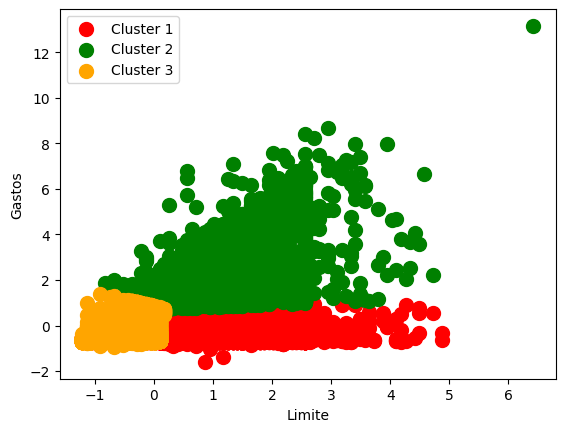

In [65]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'orange', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();